In [2]:
%matplotlib inline

In [3]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


Initialize dataset and random seed (for reproducible results)

In [4]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

# make immutable: we want to keep this data.
X_train_raw.flags.writeable = False
X_test_raw.flags.writeable = False
y_train_raw.flags.writeable = False
y_test_raw.flags.writeable = False

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Visualize data

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


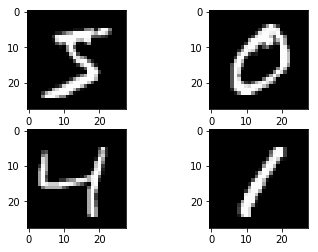

In [5]:
print("X_train shape:", X_train_raw.shape)
print("y_train shape:", y_train_raw.shape)
print("X_test shape:", X_test_raw.shape)
print("y_test shape:", y_test_raw.shape)

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train_raw[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train_raw[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train_raw[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train_raw[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [6]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train_raw.shape[1] * X_train_raw.shape[2]
X_train_flattened = X_train_raw.reshape(X_train_raw.shape[0], num_pixels).astype('float32')
X_test_flattened = X_test_raw.reshape(X_test_raw.shape[0], num_pixels).astype('float32')
print("X_train_flattened shape:", X_train_flattened.shape)
print("X_test_flattened shape:", X_test_flattened.shape)

X_train_flattened shape: (60000, 784)
X_test_flattened shape: (10000, 784)


In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train_flattened / 255
X_test = X_test_flattened / 255
print("X_train shape: still", X_train.shape)
print("X_test shape: still", X_test.shape)

X_train shape: still (60000, 784)
X_test shape: still (10000, 784)


In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train_raw)
y_test = np_utils.to_categorical(y_test_raw)
num_classes = y_test.shape[1]
print("y_test[1]: ", y_test[1])

y_test[1]:  [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


In [19]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model

In [20]:
# build the model
model = baseline_model()
print(model.layers)
print(model.inputs)
print(model.outputs)
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

[<keras.layers.core.Dense object at 0x1448e8630>, <keras.layers.core.Dense object at 0x144191cf8>]
[<tf.Tensor 'dense_11_input:0' shape=(?, 784) dtype=float32>]
[<tf.Tensor 'dense_12/Softmax:0' shape=(?, 10) dtype=float32>]
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 12s - loss: 1.2562 - acc: 0.7087 - val_loss: 0.7063 - val_acc: 0.8528
Epoch 2/20
 - 9s - loss: 0.6038 - acc: 0.8620 - val_loss: 0.4936 - val_acc: 0.8834
Epoch 3/20
 - 10s - loss: 0.4733 - acc: 0.8825 - val_loss: 0.4168 - val_acc: 0.8943
Epoch 4/20
 - 8s - loss: 0.4146 - acc: 0.8927 - val_loss: 0.3755 - val_acc: 0.9021
Epoch 5/20
 - 10s - loss: 0.3794 - acc: 0.8998 - val_loss: 0.3492 - val_acc: 0.9071
Epoch 6/20
 - 9s - loss: 0.3553 - acc: 0.9041 - val_loss: 0.3302 - val_acc: 0.9107
Epoch 7/20
 - 10s - loss: 0.3371 - acc: 0.9079 - val_loss: 0.3150 - val_acc: 0.9142
Epoch 8/20
 - 9s - loss: 0.3226 - acc: 0.9114 - val_loss: 0.3030 - val_acc: 0.9176
Epoch 9/20
 - 11s - loss: 0.3107 - acc: 0.9141 - val_loss:

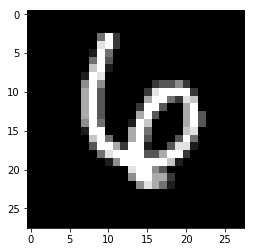

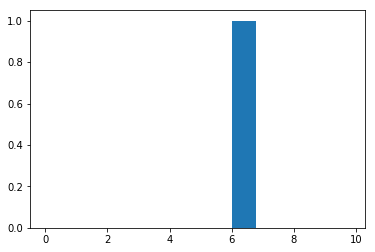

Most likely: 6


In [60]:
sample_index = 22
plt.imshow(X_test_raw[sample_index], cmap=plt.get_cmap('gray'))
plt.show()
predicted = model.predict(X_test[sample_index:sample_index + 1], 1)
plt.bar([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], predicted[0], align='edge')
plt.show()
print("Most likely:", numpy.argmax(predicted))